# Supervised Learning - Assignment

### Objective

The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Context

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

%matplotlib inline 

#### Reading dataset

In [27]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Attributes 

#### Numerical Variables:

- Age - Customer's age
- Experience - Years of professional experience the customer has.
- Income - Customer's annual income (in 1000 USD)
- CCAvg - Avg. spending on credit cards per month (in 1000 USD)
- Mortgage - Value of house mortgage if any (in 1000 USD)

#### Categorical Variables:

- ZIP Code - Home Address ZIP code.
- Family - Customer's family size (Number of members)
- Education - Education Level; 1: Undergrad, 2: Graduate, 3: Advanced/Professional
- Securities Account - Does the customer have a securities account with the bank?
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
- Online - Does the customer use internet banking facilities?
- CreditCard - Does the customer uses a credit card issued by UniversalBank?
- Personal Loan - Did this customer accept the personal loan offered in the last campaign? (Target)

#### Exploratory Data Analysis

In [28]:
#Get number of rows and columns
bank_data.shape

(5000, 14)

In [29]:
#Removing ID column from data frame
bank_data = bank_data.drop('ID', 1)

In [30]:
#Get information about column data types and non-null values
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [31]:
bank_data.isnull().count()

Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

#### OBSERVATION

Based on the above data, we can understand, there are no missing or NULL values in the dataframe

In [32]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [33]:
#Number of values in 'Experience column < 0

count = 0
exp_list = list(bank_data.Experience)

for i in range(0, len(exp_list)):
    if exp_list[i] < 0:
        count += 1
    else: pass

count

52

#### OBSERVATION

Here we have negative values in 'Experience' column. The minimum possible value for this tab would be to have 'no experience' (0 yrs). Hence, all 52 -ve values are to be removed / replaced before we process this dataset

In [34]:
#Find median of experience values >= 0
df_posexp = bank_data[bank_data['Experience'] >= 0]
pos_exp_median = np.median(list(df_posexp.Experience))
pos_exp_median

20.0

In [35]:
#Replace negative expeirence values with it's pos_exp_median(median of non-negative experience values)

new_exp_list = []
for i in range(0, len(exp_list)):
    if exp_list[i] < 0:
        new_exp_list.append(pos_exp_median)
    else:
        new_exp_list.append(exp_list[i])

bank_data['Experience'] = new_exp_list
bank_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4.0,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,90034,3,0.5,2,0,0,0,0,1,0


In [36]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Study the data distribution in each attribute, share your findings

##### Visualizing Continuous Variables

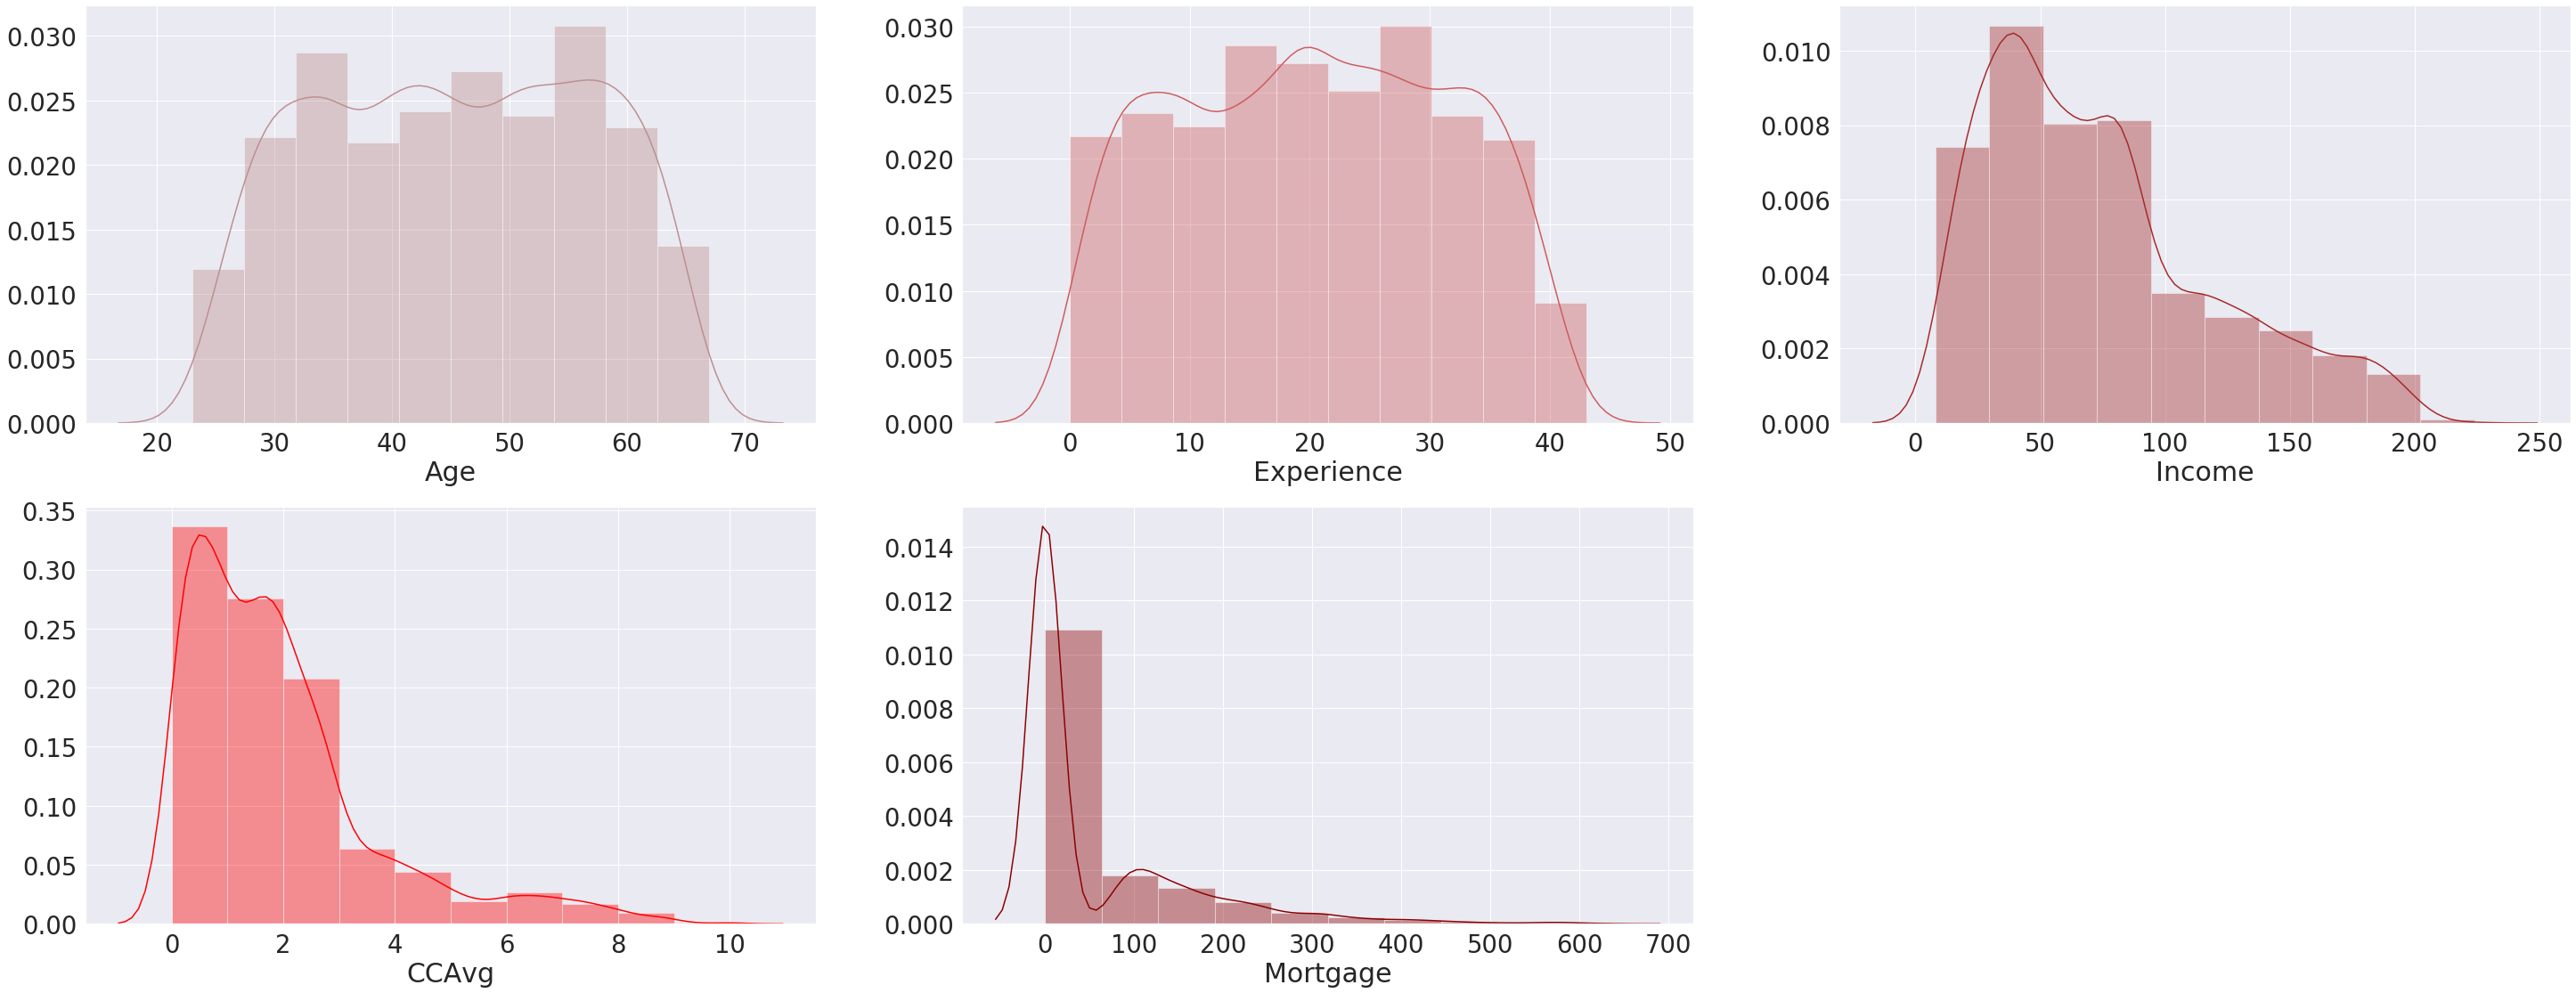

In [37]:
plt.figure(figsize=(50,50))
sns.set(font_scale=2.5) 

plt.subplot(5,3,1)
sns.distplot(bank_data.Age, bins = 10, color='rosybrown');

plt.subplot(5,3,2)
sns.distplot(bank_data.Experience, bins = 10, color='indianred');

plt.subplot(5,3,3)
sns.distplot(bank_data.Income, bins = 10, color='brown');

plt.subplot(5,3,4)
sns.distplot(bank_data.CCAvg, bins = 10, color='red');

plt.subplot(5,3,5)
sns.distplot(bank_data.Mortgage, bins = 10, color='darkred');

#### OBSERVATION

Here we have visualized distribution for numberical attributes, of which the following observations were made:
- Age and Experience was normally distributed
- Income, CC Average and Mortgage are highly right skewed

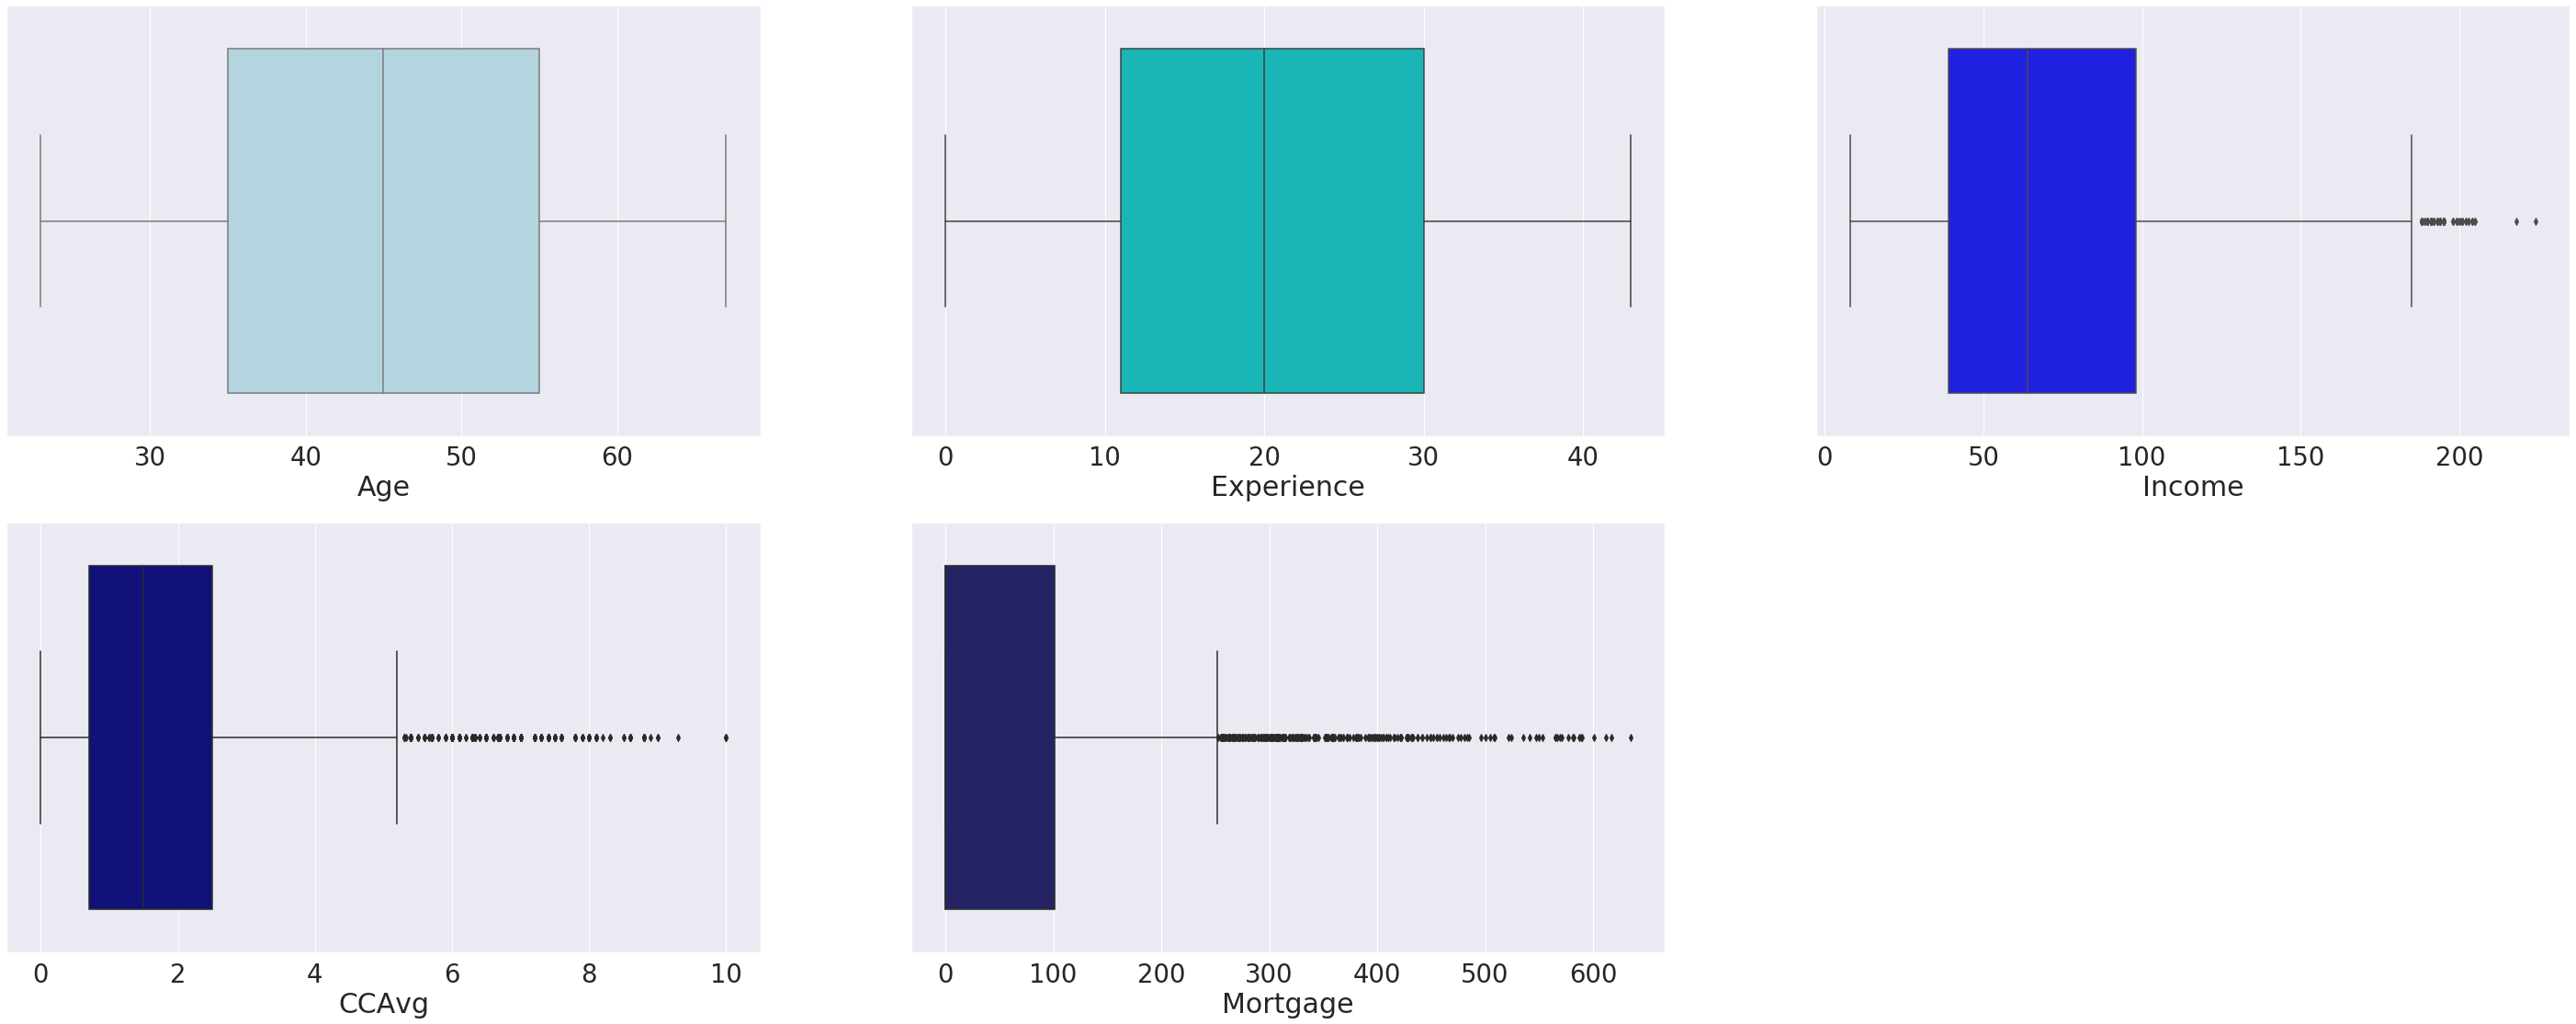

In [38]:
plt.figure(figsize= (50,50))
plt.subplot(5,3,1)
sns.boxplot(x= bank_data.Age, color='lightblue');

plt.subplot(5,3,2)
sns.boxplot(x= bank_data.Experience, color='darkturquoise');

plt.subplot(5,3,3)
sns.boxplot(x= bank_data.Income, color='blue');

plt.subplot(5,3,4)
sns.boxplot(x= bank_data.CCAvg, color='darkblue');

plt.subplot(5,3,5)
sns.boxplot(x= bank_data.Mortgage, color='midnightblue');

#### OBSERVATION

- Age is normally distributed with most of customers in the range between 35 and 55 years of age.
- Experience is normally distributed with most of the customer having experience in the range between 11 to 30 Years.
- Income is positively skewed (Right skewed) and majority of the customers have income between 45K and 100K. 
- CCAvg is also a positively skewed with major chunk of customers spend in the range between 0.5K to 2K per month on their credit card.
- Mortgage has the maximum outliers with the maximum value being 635 and minimum and 50% values being 0 each (from describe() table).

##### Visualizing Discrete Variables

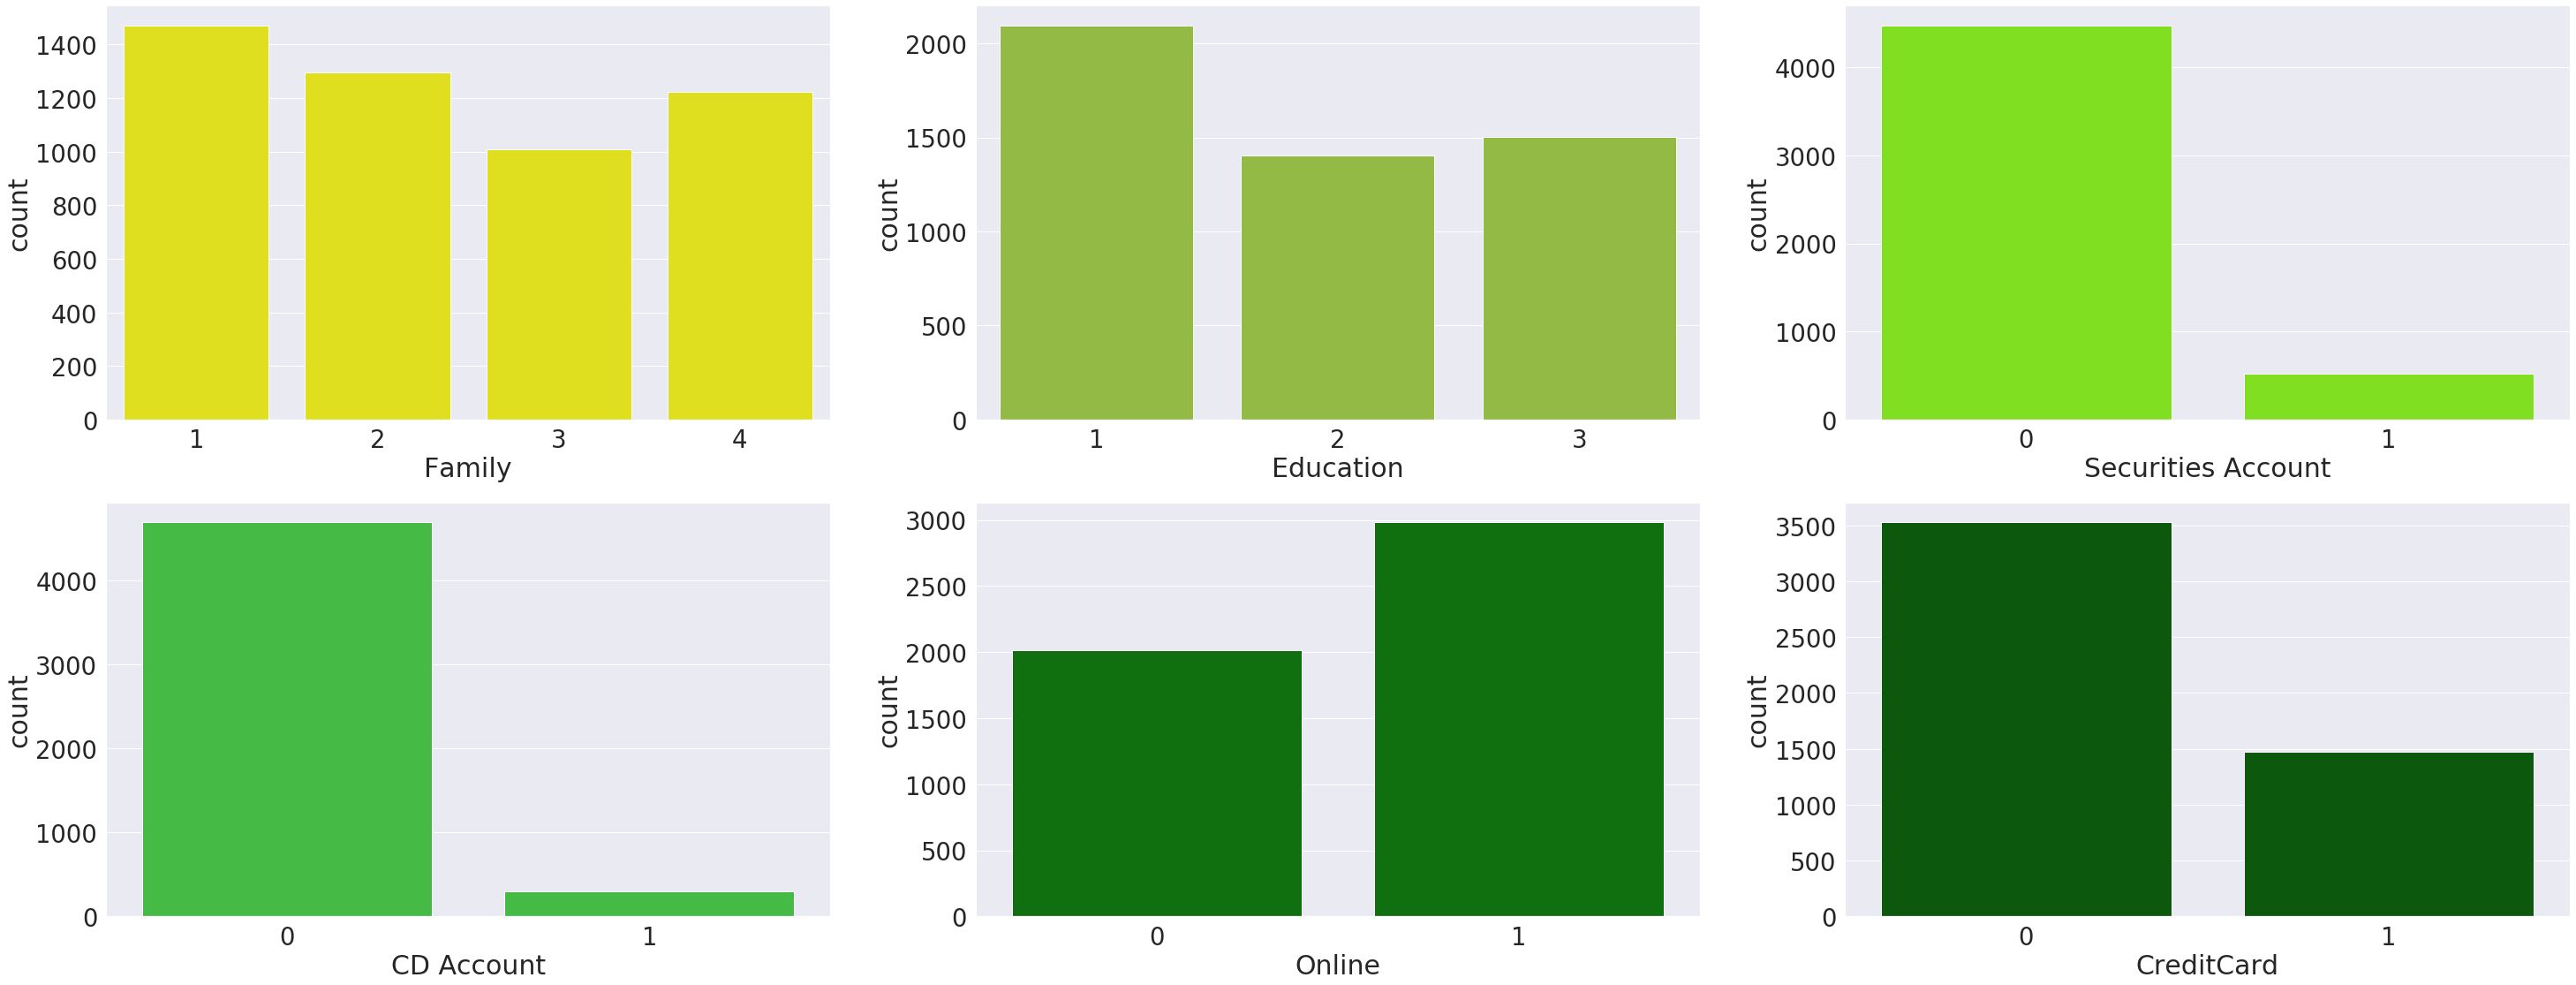

In [39]:
plt.figure(figsize= (50,50))

plt.subplot(5,3,1)
sns.countplot(x=bank_data['Family'], color='yellow');

plt.subplot(5,3,2)
sns.countplot(x=bank_data['Education'], color='yellowgreen');

plt.subplot(5,3,3)
sns.countplot(x=bank_data['Securities Account'], color='chartreuse');

plt.subplot(5,3,4)
sns.countplot(x=bank_data['CD Account'], color='limegreen');

plt.subplot(5,3,5)
sns.countplot(x=bank_data['Online'], color='green');

plt.subplot(5,3,6)
sns.countplot(x=bank_data['CreditCard'], color='darkgreen');

#### Observations

- The distribution of family and education attributes are even.
- Most of the customers do not seem to hold any Securities Account and CD Account.
- The number of customers not using a credit card from Universal bank is more than twice that of the users.

NB: Zipcode was removed as it has too much categorical variables to visualize and is irrelevant for our problem at this instance. Personal Loans being the target variables, has not been visualized at this instance.

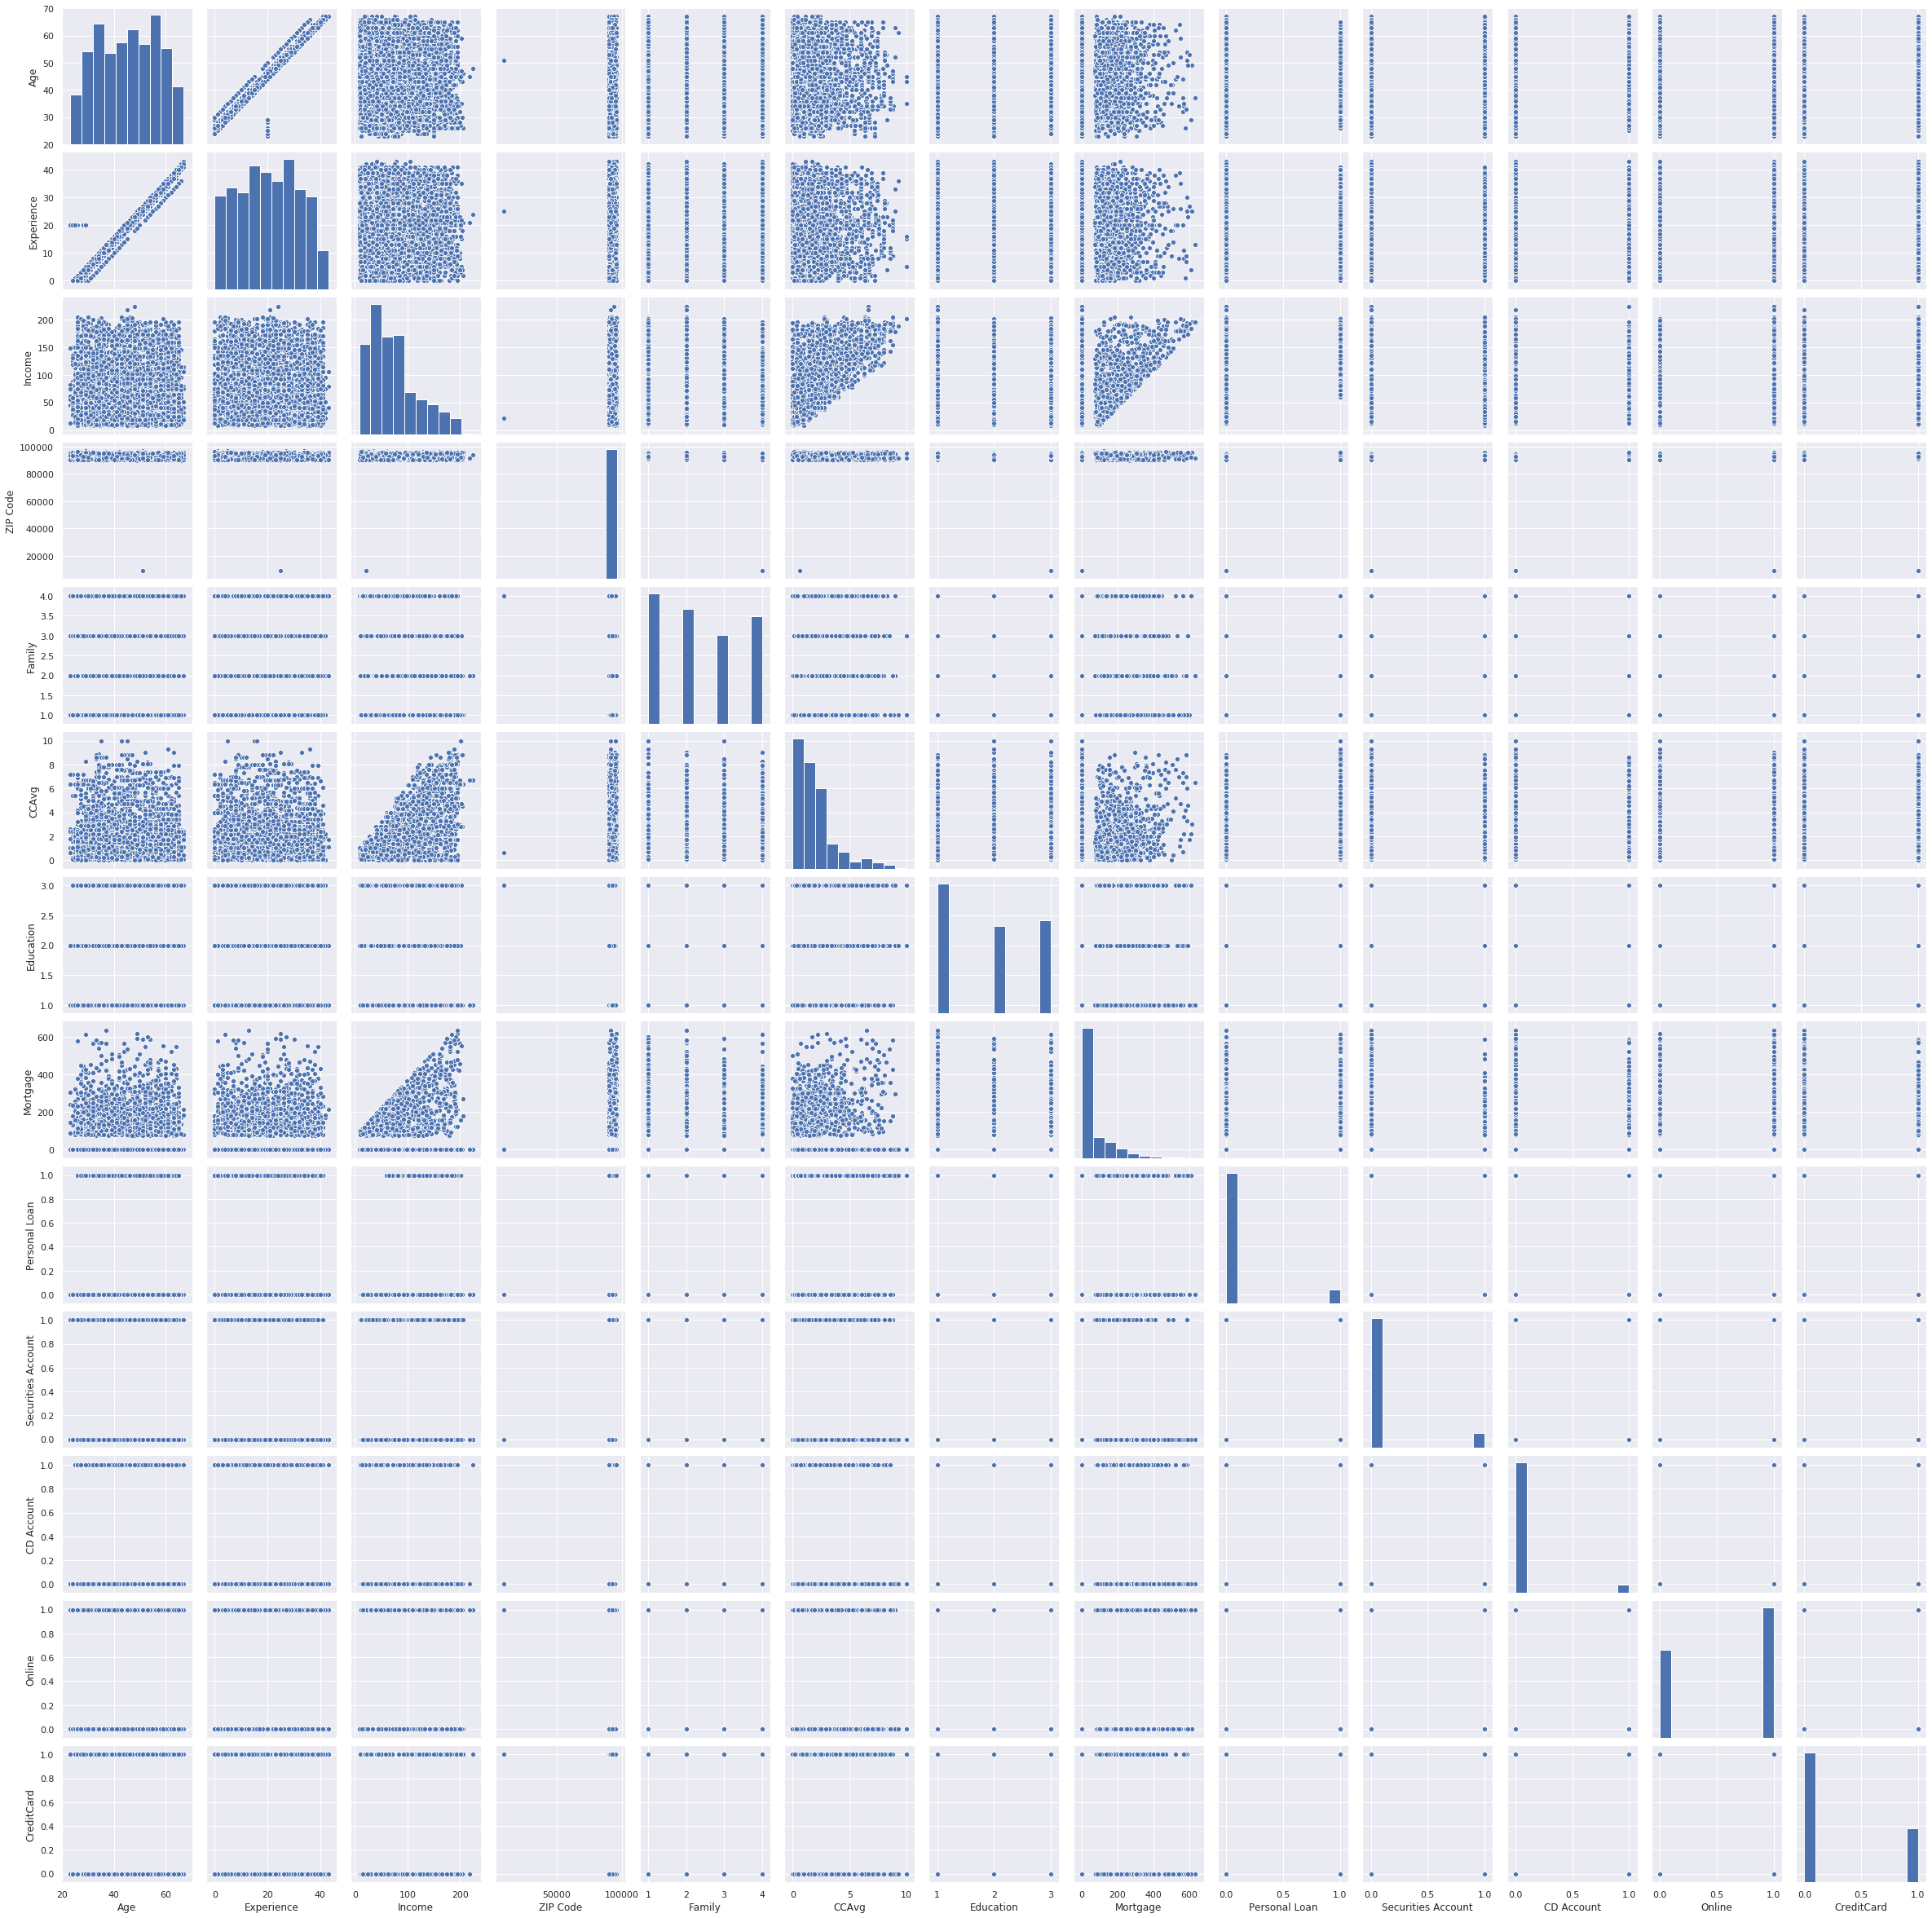

In [40]:
#Pair plot - Trying to find any relationship
sns.set(font_scale=1) 
sns.pairplot(bank_data);

#### Observations

- Only association we can observe here is the linear relationship between 'Age' and 'Experience'

### Get the target column distribution. Your comments

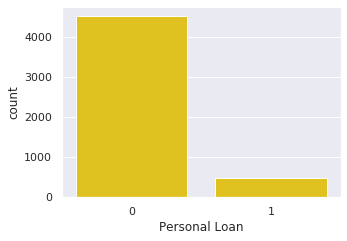

In [41]:
plt.figure(figsize=(5,3.5))
sns.set(font_scale=1) 
sns.countplot(x = bank_data['Personal Loan'], color='gold');

In [42]:
didnot_avail_PL = bank_data['Personal Loan'].value_counts()[0]
dnt_avail_perc = round((didnot_avail_PL/len(list(bank_data['Personal Loan']))) * 100, 2)
avail_PL = bank_data['Personal Loan'].value_counts()[1]
avail_perc = round((avail_PL/len(list(bank_data['Personal Loan']))) * 100, 2)

obs = str(dnt_avail_perc) + "% of the customers did not avail personal loan, whilst only for " + str(avail_perc) + "% of the customers, availed the personal loan offer."
print(obs)

90.4% of the customers did not avail personal loan, whilst only for 9.6% of the customers, availed the personal loan offer.


### Split the data into training and test set in the ratio of 70:30 respectively

In [49]:
train_set, test_set = train_test_split(bank_data, test_size=0.3 , random_state=100)

train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

train_set_independent = bank_data.drop(['Experience'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dependent = bank_data["Personal Loan"]

X = np.array(train_set_independent)
Y = np.array(train_set_dependent)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [50]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Use different classification models to predict the likelihood of a customer buying personal loans

#### a) Logistic Regression

In [51]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_

model_score = model.score(x_test, y_test)
print("Model Accuracy: " + str(round((model_score)*100,2)) + "%")

Model Accuracy: 90.73%


##### Confusion Matrix

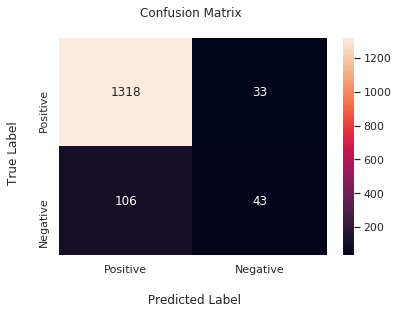

In [52]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")

plt.title("Confusion Matrix \n")
plt.xlabel("\n Predicted Label")
plt.ylabel("True Label   \n")
plt.show()

- True Positives (TP): For 1318 customers, we correctly predicted that they would avail a personal loan.
- True Negatives (TN): For 43 customers, we correctly predicted that would not avail personal loan.
- False Positives (FP): We incorrectly predicted that 106 customers would avail personal loan (Type I error).
- False Negatives (FN): For 33 customer, We incorrectly predicted that they wouldn't avail personal loan (Type II error)

#### b) K-NN

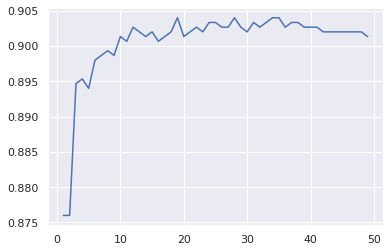

In [64]:
# Building list for k values

k_val =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    NNH.fit(x_train, y_train)
    k_val.append(NNH.score(x_test, y_test))
    
plt.plot(range(1,50), k_val);

Usually an odd number is choosen as the value of K. A small value of k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently. Thus based on the above plot, I'm going with a value of 18 for K.

In [65]:
NNH = KNeighborsClassifier(n_neighbors= 18 , weights = 'distance' )
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='distance')

In [66]:
predicted_labels = NNH.predict(x_test)
model_score = NNH.score(x_test, y_test)
print("Model Accuracy: " + str(round((model_score)*100,2)) + "%")

Model Accuracy: 90.2%


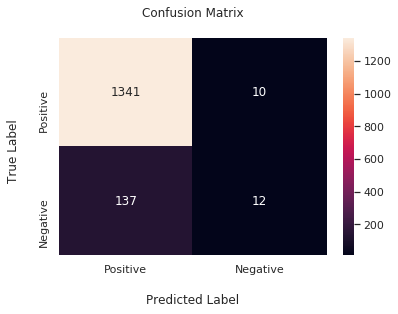

In [67]:
# Confusion Matrix

cm1 = metrics.confusion_matrix(y_test, predicted_labels)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)

sns.heatmap(df_cm1, annot = True, fmt = "d");

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("True Label  \n")
plt.show()

- True Positives (TP): For 1341 customers, we correctly predicted that they would avail a personal loan.
- True Negatives (TN): For 12 customers, we correctly predicted that would not avail personal loan.
- False Positives (FP): We incorrectly predicted that 137 customers would avail personal loan (Type I error).
- False Negatives (FN): For 10 customer, We incorrectly predicted that they wouldn't avail personal loan (Type II error)

#### c) Naïve Bayes

In [68]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)

model_score = naive_bayes_model.predict(x_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, model_score)))

Model Accuracy: 0.8833


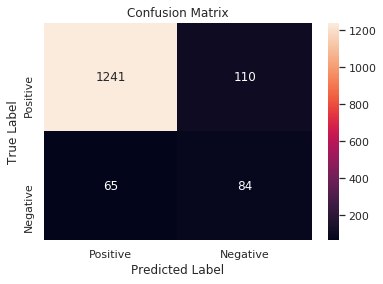

In [69]:
# Confusion Matrix
cm2 = metrics.confusion_matrix(y_test, model_score)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d");

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

- True Positives (TP): For 1241 customers, we correctly predicted that they would avail a personal loan.
- True Negatives (TN): For 84 customers, we correctly predicted that would not avail personal loan.
- False Positives (FP): We incorrectly predicted that 65 customers would avail personal loan (Type I error).
- False Negatives (FN): For 110 customer, We incorrectly predicted that they wouldn't avail personal loan (Type II error)

### Model Comparison

In [70]:
from sklearn import model_selection
import warnings 
warnings.filterwarnings('ignore')

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('Naïve Bayes', GaussianNB()))

#Evaluating each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

Logistic Regression: 0.911400 (0.014780)
K-NN: 0.898600 (0.008902)
Naïve Bayes: 0.885600 (0.010385)


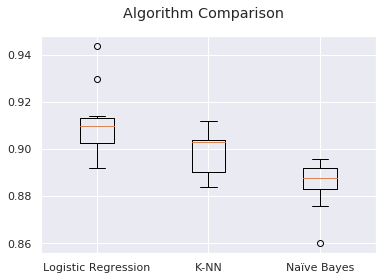

In [71]:
# Visualization for algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Inference

- Two classification algorithms were used in this study. 
- From the above graph, it is clear that 'Logistic Regression' algorithm have the highest accuracy and KNN's accuracy is not centered.
- Hence choosing 'Logistic Regression' as the correct model for this use-case.